In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('All_datasets\data\health_insurance_cost_missing_data.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isna().sum()

age         0
sex         0
bmi         1
children    0
smoker      0
region      1
charges     0
dtype: int64

In [5]:
data=data.fillna(method='bfill')
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,33.770,0,yes,southeast,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# converting string features into such as sex,smoker,region into numeric to utilize these for model building

#     ------------------------- Label Encode ------------ 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
#encode smoker and region
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,33.770,0,1,2,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


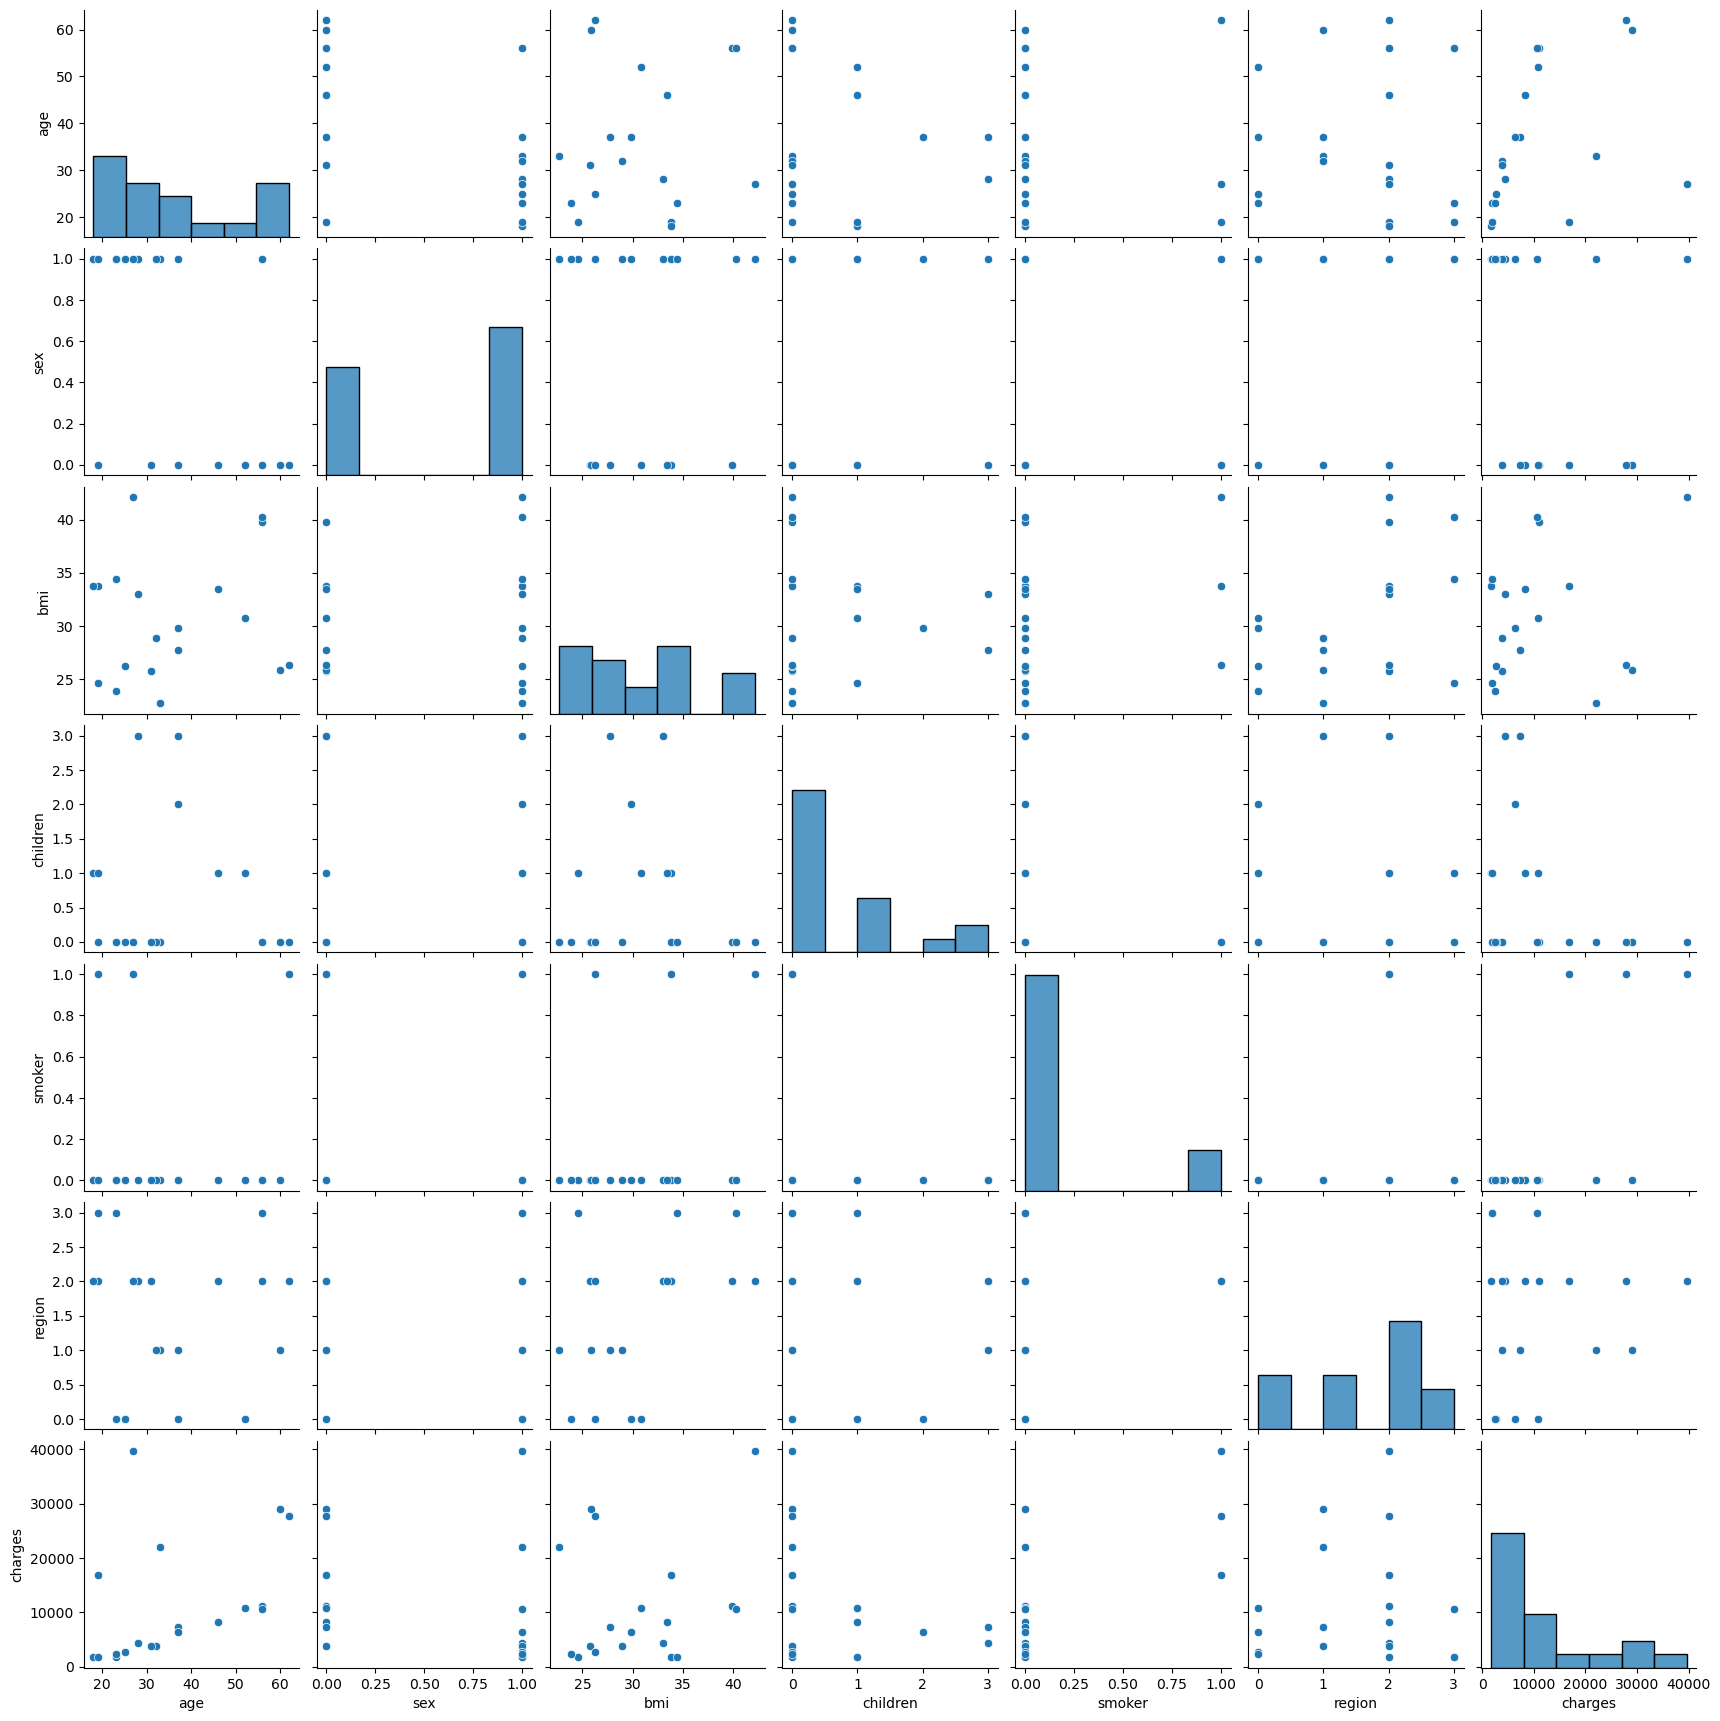

In [18]:
sns.pairplot(data)

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,33.770,0,1,2,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
sns.boxplot(data['region'],data['charges']) # why getting this error, whilein Govind file hasn't error


TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

In [24]:
sns.barplot(data['sex'],data['bmi'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [25]:
x=data.iloc[:,:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,33.770,0,1,2
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [26]:
y=data.iloc[:,-1:]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


# Model Building

In [27]:
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=1)


In [28]:
from sklearn.linear_model import LinearRegression
mul_reg=LinearRegression()
#------train the model
mul_reg.fit(xtrain,ytrain)
#--------- Test model
ypred=mul_reg.predict(xtest)

# -------------------------------------Cost model
from sklearn.metrics import mean_squared_error,r2_score
#from sklearn.metrics import r2_score
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square:\t',r2_score(ytest,ypred))



RMSE: 	 8889.699899991507

R-Square:	 -0.2179968672175645


<Axes: >

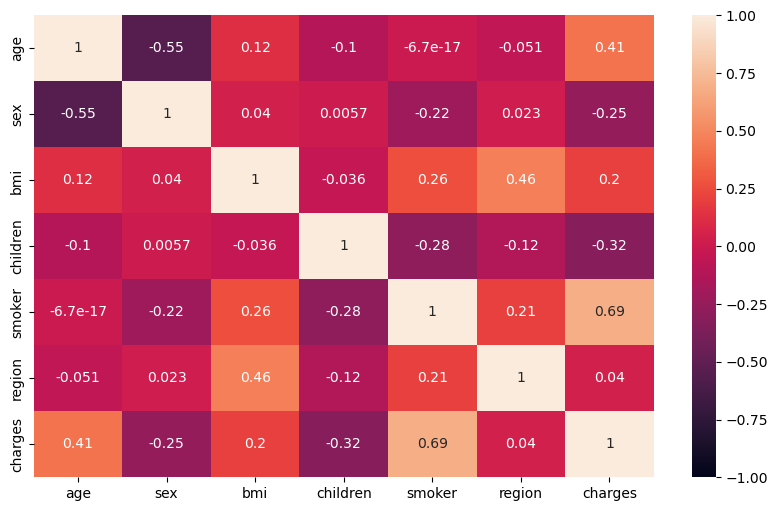

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)